Why semi-supervised learning?

In [1]:
import os
os.chdir("../..")

https://stats.stackexchange.com/questions/321841/what-are-variational-autoencoders-and-to-what-learning-tasks-are-they-used

Ideal parameters:
$$ \min_{\boldsymbol{\lambda}}\mathcal{D}[p(\mathbf{z}\vert \mathbf{x})\vert\vert q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda})] $$

It should also minimize the reconstruction loss (and optional regularization terms, mainly L1 or L2)

VAE loss function:
$$ELBO(\boldsymbol{\lambda})= E_{q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})}[\log p(\mathbf{x}\vert\boldsymbol{z})]-\mathcal{D}[(q(\boldsymbol{z}\vert \mathbf{x},\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})]$$

$$ q(\mathbf{z}\vert \mathbf{x},\boldsymbol{\lambda}) = \mathcal{N}(\mathbf{z}\vert\boldsymbol{\mu}(\mathbf{x}), \boldsymbol{\sigma}^2(\mathbf{x})I) $$

conditional distribution:
$$ p_{\boldsymbol{\phi}}(\mathbf{x}\vert\mathbf{z}) = \mathcal{N}(\mathbf{x}|\boldsymbol{\mu}(\mathbf{z}; \boldsymbol{\phi}), \boldsymbol{\sigma}(\mathbf{z}; \boldsymbol{\phi})^2I)$$


$$ ELBO(\boldsymbol{\theta},\boldsymbol{\phi})= \sum_i E_{q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})}[\log p_{\boldsymbol{\phi}}(\mathbf{x}_i\vert\boldsymbol{z})]-\mathcal{D}[(q_{\boldsymbol{\theta}}(\boldsymbol{z}\vert \mathbf{x}_i,\boldsymbol{\lambda})\vert\vert p(\boldsymbol{z})] $$

In [2]:
# Import packages
from data_preparation.GeoParser import GeoParser
from dimension_reduction.ordination import ordination2d
from sklearn.decomposition import PCA
from IPython.display import Image
import pandas as pd
import numpy as np
load_from_disk = True
load_merge = False


Import models

In [3]:
#from models.discriminative.artificial_neural_networks.hebbian_network.HebbNet import HebbNet
from models.discriminative.artificial_neural_networks.MultiLayerPerceptron import MLP
from utils.utils import dict_of_int_highest_elements, plot_evaluation

In [4]:
geo_ids = ["GSE33000"]
# files_destinations
home_path = "/home/simon/"
destination_folder = "annleukemia"
data_folder = "data"
results_folder = "results"
meta_destination_folder = "pandas_meta_df"

plots_folder_path = "/".join([home_path, destination_folder, results_folder, "plots/"])


In [5]:
#dataset_name = "gse33000_and_GSE24335_GSE44768_GSE44771_GSE44770"
dataset_name = "gse33000+4"
activation = "relu"
#nrep = 3
early_stopping = 200
n_epochs = 100
gt_input = 0
extra_class=True
# if ladder is yes builds a ladder vae. Do not combine with auxiliary (yet; might be possible and relatively 
# not too hard to implement, but might be overkill. Might be interesting too)
translate = "n" 


In [6]:
# Types of deep generative model

# Convolution neural network (convolutional VAE and convolutional classifier)
use_conv = False #Not applicable if not sequence (images, videos, sentences, DNA...)

Definition of the hyper-parameters

In [7]:
lr = 1e-5
l1 = 1e-8
l2 = 1e-8
batch_size = 32
#mc = 1 
#iw = 1 

# Neurons layers
h_dims = [1024, 128]


In [8]:
from utils.utils import adapt_datasets
g = GeoParser(home_path=home_path, geo_ids=geo_ids)
g.get_geo(load_from_disk=load_from_disk, automatic_attribute_list=None)
meta_df = g.merge_datasets(load_from_disk=load_merge, labelled=True)
if translate is "y":
    for geo_id in geo_ids:
        g.translate_indices_df(geo_id, labelled=True)
    for geo_id in unlabelled_geo_ids:
        g.translate_indices_df(geo_id, labelled=False)



Running: GSE33000
Loading GSE33000, labelled: True ...
File found at location: /home/simon//annleukemia/data//GSE33000_labelledTrue_dataframe.pickle.npy
self.df[geo_id] (35371, 624)
Preparing for merging the selected datasets... labelled: True
The file you were looking for is there
File found!
merging file: 1 / 1
(35371, 624)
Saving files...
Merged sets loaded.


plot at  /home/simon//annleukemia/results/plots//pca/gse33000+4/none/
coeff shape (35371, 2)


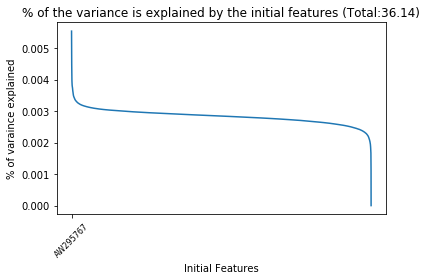

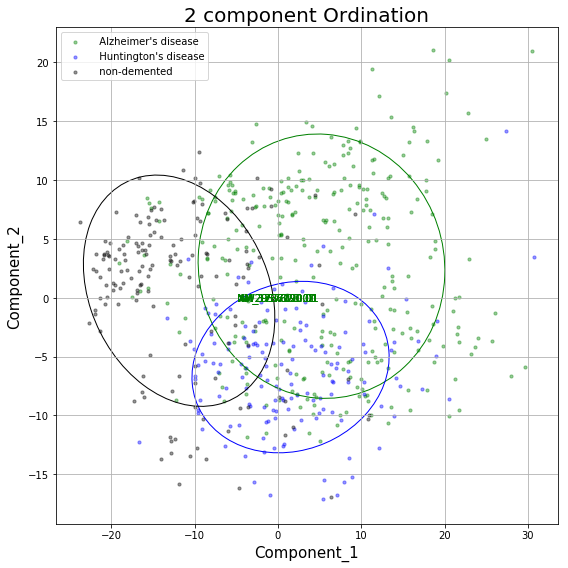

In [9]:
ordination2d(meta_df, epoch="pre", dataset_name=dataset_name, ord_type="pca", images_folder_path=plots_folder_path)

In [10]:
# TODO CHANGE hard coded input size, should be easy to get from get_geo
labels = set(list(meta_df.columns))
print(labels)
mlp = MLP(input_size=meta_df.shape[0], input_shape=(meta_df.shape[0]), 
          indices_names=list(range(meta_df.shape[0])), num_classes=len(labels), 
          h_dims=h_dims, extra_class=extra_class, l1=l1, l2=l2, batch_norm=True)

mlp.set_configs(home_path=home_path, results_folder=results_folder, data_folder=data_folder,
                    destination_folder=destination_folder, dataset_name=dataset_name, lr=lr,
                    meta_destination_folder="meta_pandas_dataframes", csv_filename="csv_loggers", is_unlabelled=False)

{"  Alzheimer's disease", '  non-demented', "  Huntington's disease"}
self.input_size 35371


In [11]:
print("Labeled data shape (35371, 624)", meta_df.shape)
if meta_df is not None:
    mlp.import_dataframe(meta_df, batch_size, labelled=True)

Labeled data shape (35371, 624) (35371, 624)


In [12]:
subset = meta_df[0:1000]

In [13]:
#tSNE
#ordination2d(subset, epoch="pre", dataset_name=dataset_name, ord_type="tsne", images_folder_path=plots_folder_path)

In [14]:
#mlp.define_configurations(early_stopping=early_stopping, warmup=warmup, flavour=vae_flavour)
print("train data shape", meta_df.shape)


train data shape (35371, 624)


499 train samples
62 valid samples
63 valid samples
624 total samples
No unlabelled data
self.train_loader 15
self.train_loader 32
self.train_loader <torch.utils.data.sampler.RandomSampler object at 0x7f4f1c563160>
Log file created:  logs/MLP_parameters.log
Log file created:  logs/MLP_involvment.log
Log file created:  logs/MLP.log
Labeled shape 15
epoch 1
[Train]		 Loss: 1.31, accuracy: 0.5333
[Validation]	 J_a: 0.02, accuracy: 0.0096


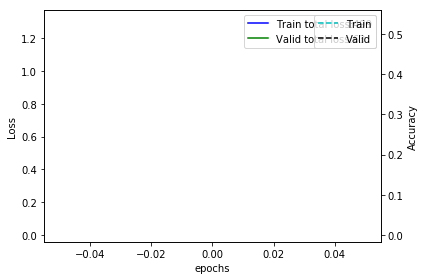

epoch 2
[Train]		 Loss: 1.20, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0116


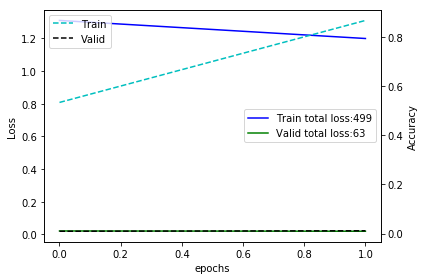

epoch 3
[Train]		 Loss: 1.14, accuracy: 0.6667
[Validation]	 J_a: 0.02, accuracy: 0.0116


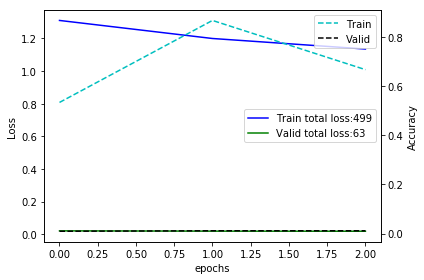

epoch 4
[Train]		 Loss: 1.12, accuracy: 0.8000
[Validation]	 J_a: 0.02, accuracy: 0.0116


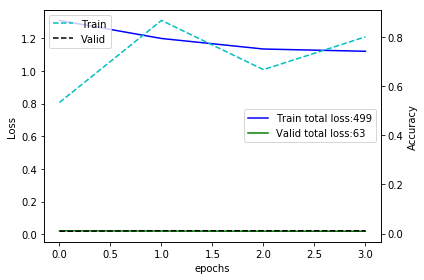

epoch 5
[Train]		 Loss: 1.10, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0111


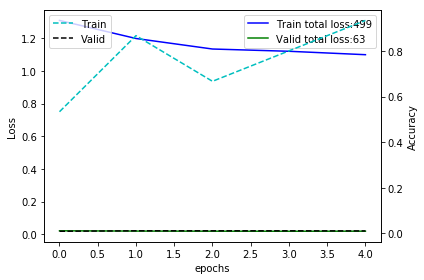

epoch 6
[Train]		 Loss: 1.09, accuracy: 0.7333
[Validation]	 J_a: 0.02, accuracy: 0.0106


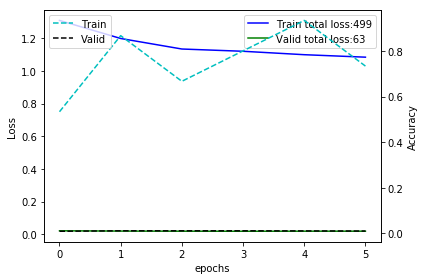

epoch 7
[Train]		 Loss: 1.08, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0111


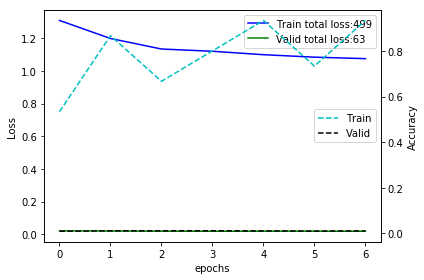

epoch 8
[Train]		 Loss: 1.05, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0116


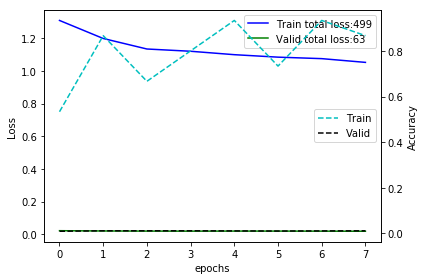

epoch 9
[Train]		 Loss: 1.06, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0131


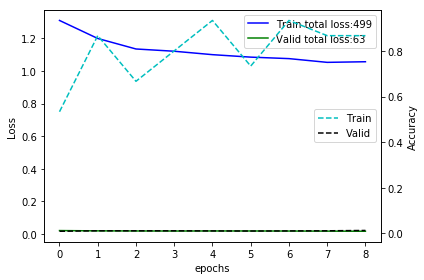

epoch 10
[Train]		 Loss: 1.03, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0126


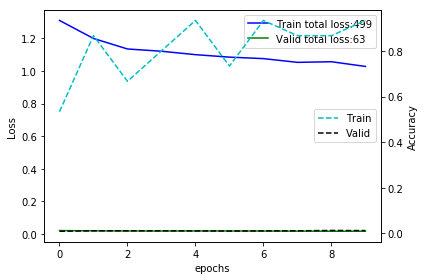

epoch 11
[Train]		 Loss: 1.02, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0136


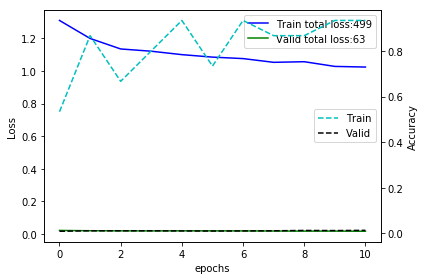

epoch 12
[Train]		 Loss: 1.03, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0116


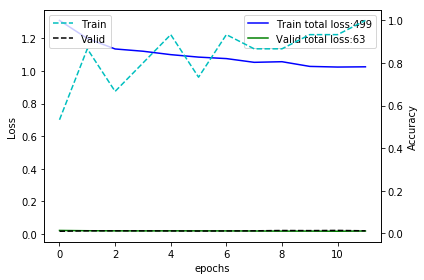

epoch 13
[Train]		 Loss: 1.01, accuracy: 0.8000
[Validation]	 J_a: 0.02, accuracy: 0.0121


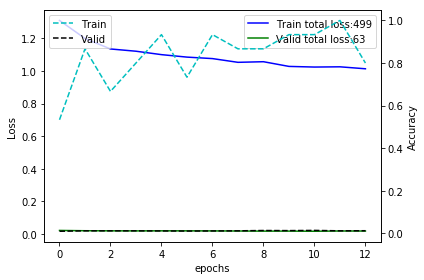

epoch 14
[Train]		 Loss: 1.01, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0126


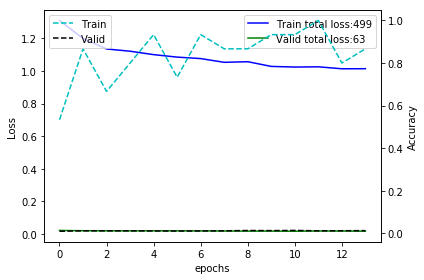

epoch 15
[Train]		 Loss: 0.99, accuracy: 0.6667
[Validation]	 J_a: 0.02, accuracy: 0.0131


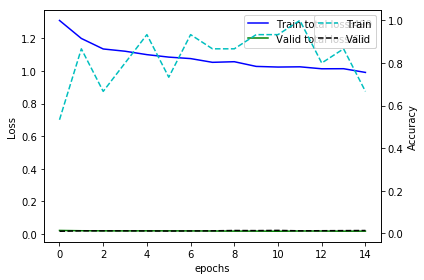

epoch 16
[Train]		 Loss: 1.00, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0161


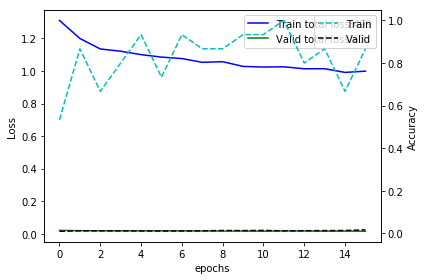

epoch 17
[Train]		 Loss: 1.00, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


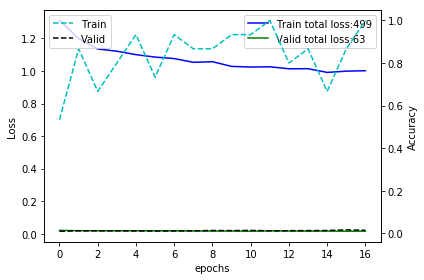

epoch 18
[Train]		 Loss: 0.99, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0141


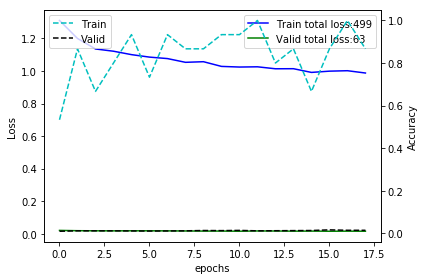

epoch 19
[Train]		 Loss: 0.98, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0116


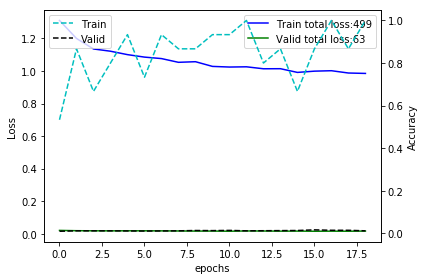

epoch 20


/home/simon/annleukemia/utils/plots.py:17: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  ax.plot(x, mlab.normpdf(x, mu, sigma))


[Train]		 Loss: 0.97, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


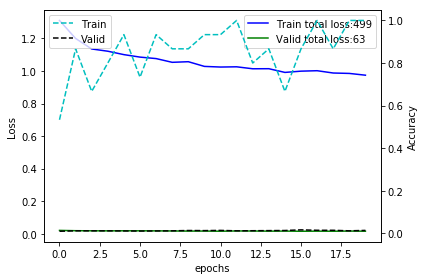

epoch 21
[Train]		 Loss: 0.97, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0136


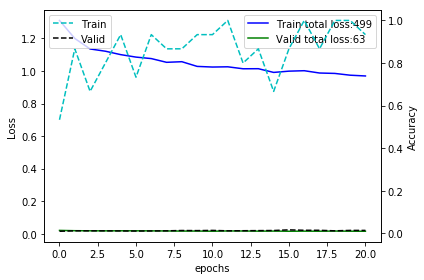

epoch 22
[Train]		 Loss: 0.97, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0121


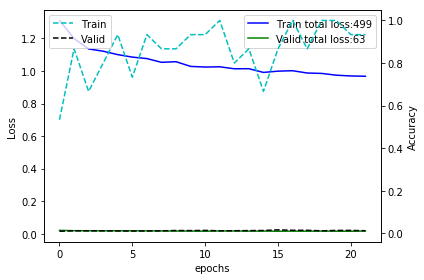

epoch 23
[Train]		 Loss: 0.95, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0126


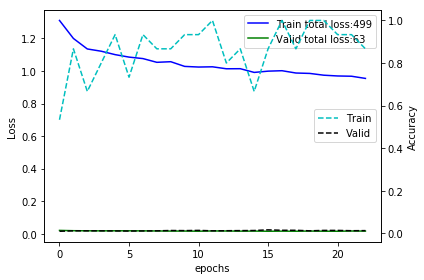

epoch 24
[Train]		 Loss: 0.96, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0131


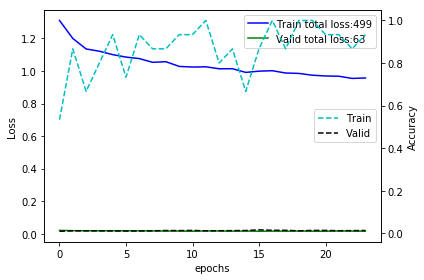

epoch 25
[Train]		 Loss: 0.97, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


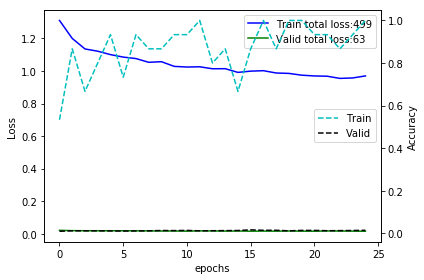

epoch 26
[Train]		 Loss: 0.95, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


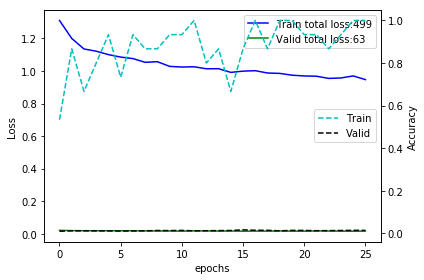

epoch 27
[Train]		 Loss: 0.96, accuracy: 0.8000
[Validation]	 J_a: 0.02, accuracy: 0.0141


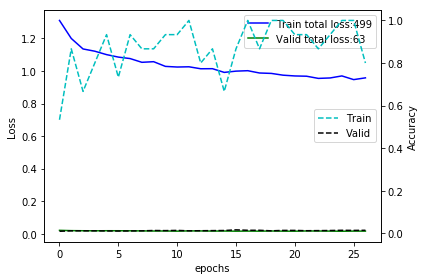

epoch 28
[Train]		 Loss: 0.94, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0136


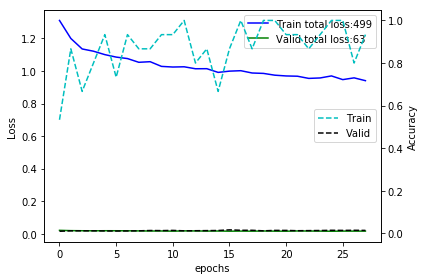

epoch 29
[Train]		 Loss: 0.95, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0141


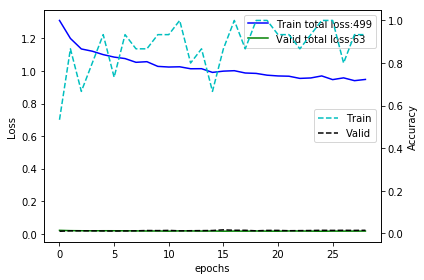

epoch 30
[Train]		 Loss: 0.94, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0126


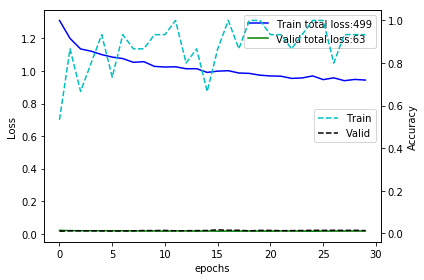

epoch 31
[Train]		 Loss: 0.93, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0131


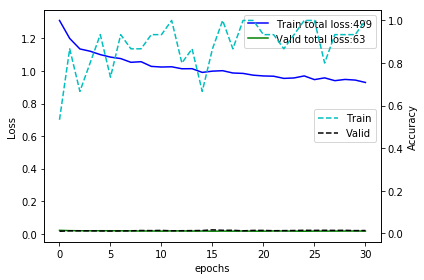

epoch 32
[Train]		 Loss: 0.93, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0126


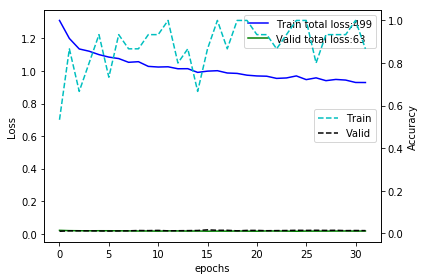

epoch 33
[Train]		 Loss: 0.93, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0131


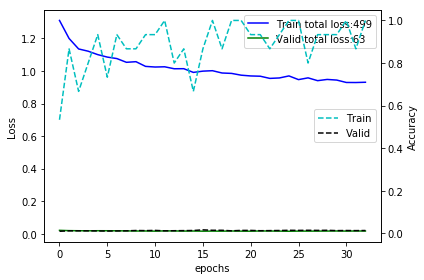

epoch 34
[Train]		 Loss: 0.93, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0141


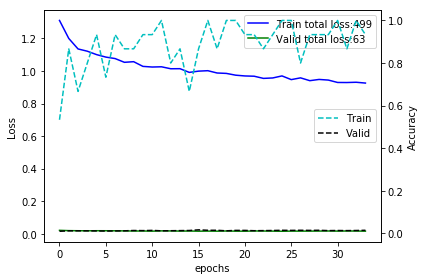

epoch 35
[Train]		 Loss: 0.91, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


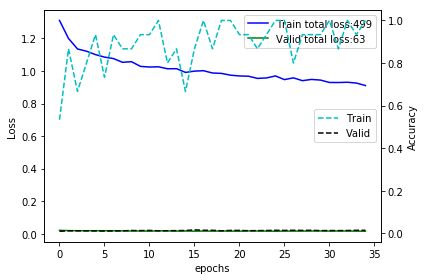

epoch 36
[Train]		 Loss: 0.92, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


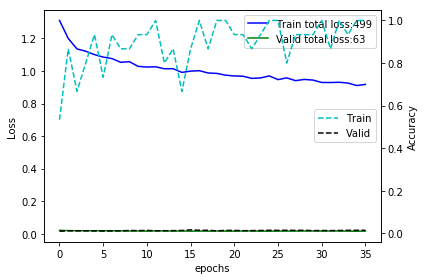

epoch 37
[Train]		 Loss: 0.92, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


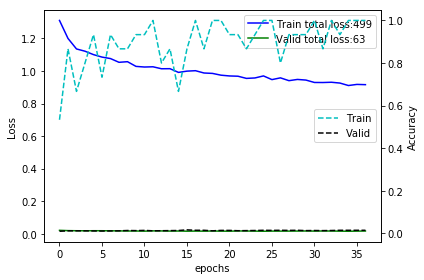

epoch 38
[Train]		 Loss: 0.91, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


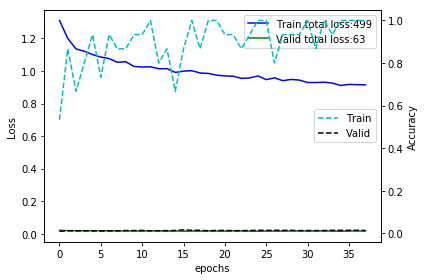

epoch 39
[Train]		 Loss: 0.92, accuracy: 0.9333
[Validation]	 J_a: 0.01, accuracy: 0.0151


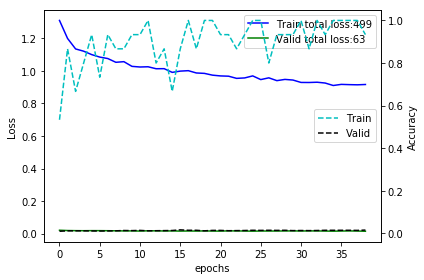

epoch 40
[Train]		 Loss: 0.92, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


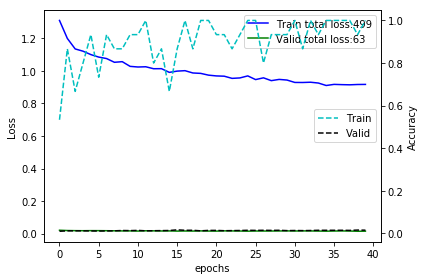

epoch 41
[Train]		 Loss: 0.91, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


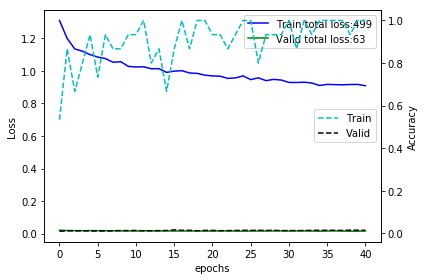

epoch 42
[Train]		 Loss: 0.91, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0131


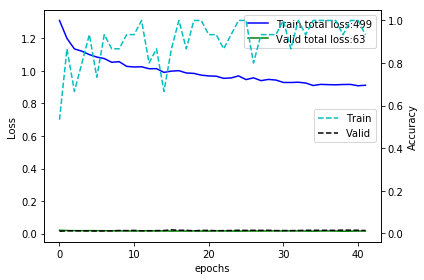

epoch 43
[Train]		 Loss: 0.91, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


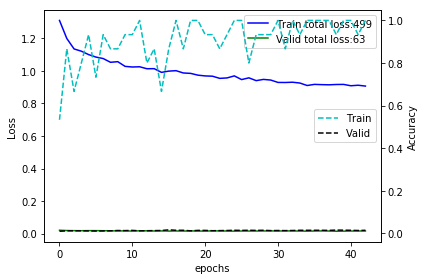

epoch 44
[Train]		 Loss: 0.90, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0141


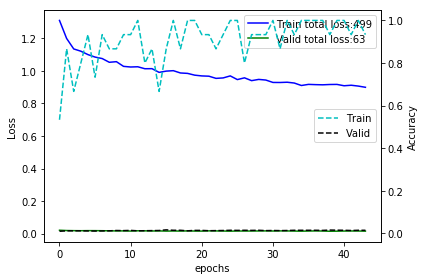

epoch 45
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


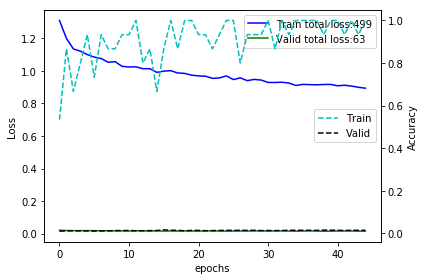

epoch 46
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


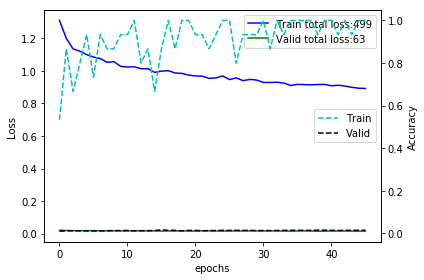

epoch 47
[Train]		 Loss: 0.90, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0151


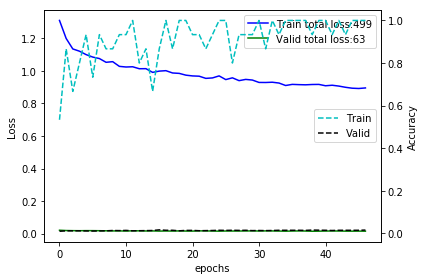

epoch 48
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


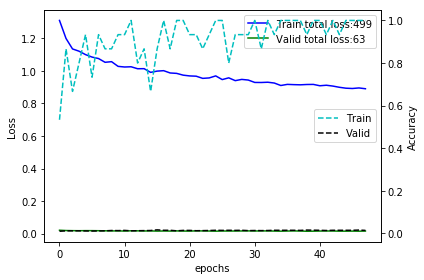

epoch 49
[Train]		 Loss: 0.88, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0131


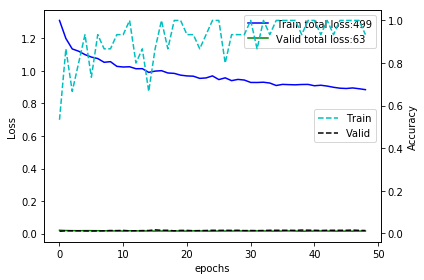

epoch 50
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0131


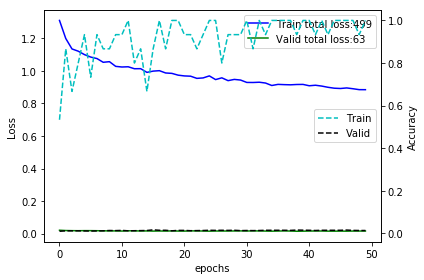

epoch 51
[Train]		 Loss: 0.90, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0131


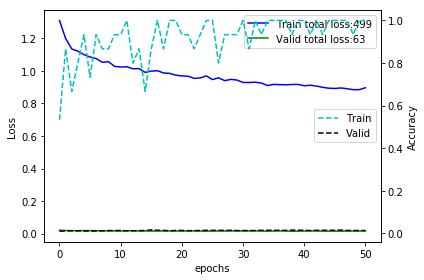

epoch 52
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


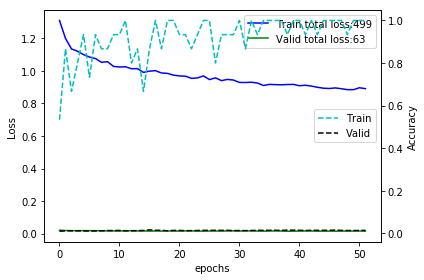

epoch 53
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0156


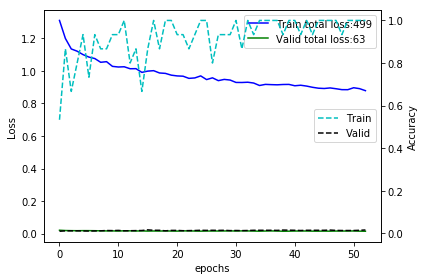

epoch 54
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


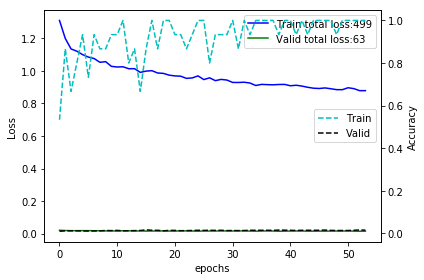

epoch 55
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


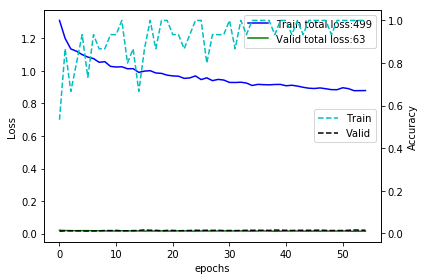

epoch 56
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


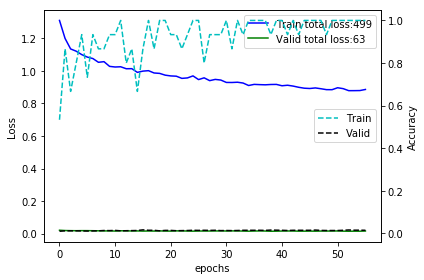

epoch 57
[Train]		 Loss: 0.89, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0156


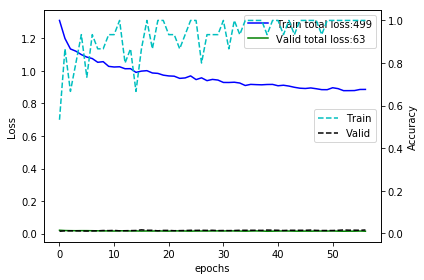

epoch 58
[Train]		 Loss: 0.87, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0141


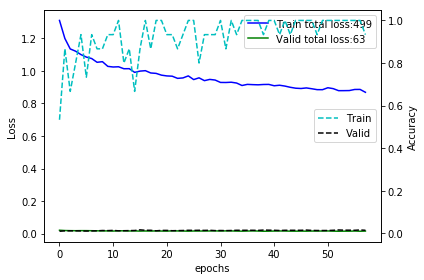

epoch 59
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0151


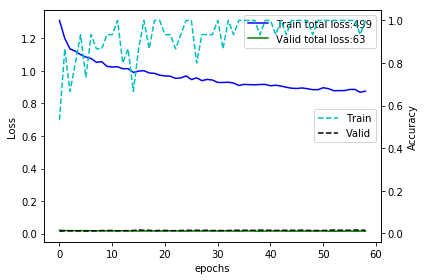

epoch 60
[Train]		 Loss: 0.87, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


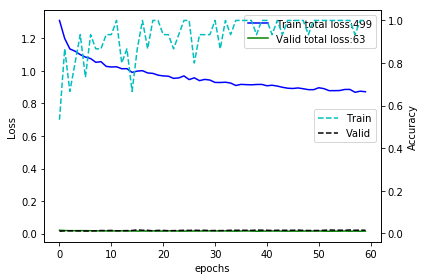

epoch 61
[Train]		 Loss: 0.87, accuracy: 0.9333
[Validation]	 J_a: 0.01, accuracy: 0.0161


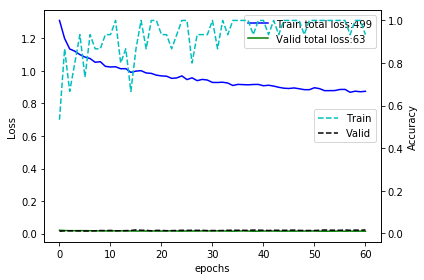

epoch 62
[Train]		 Loss: 0.88, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


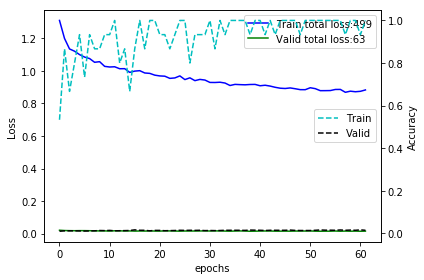

epoch 63
[Train]		 Loss: 0.87, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


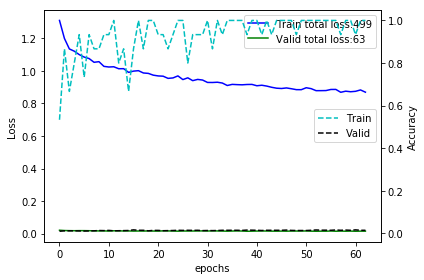

epoch 64
[Train]		 Loss: 0.87, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


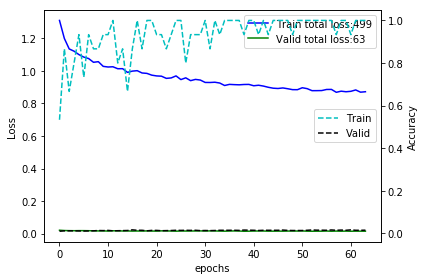

epoch 65
[Train]		 Loss: 0.87, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0156


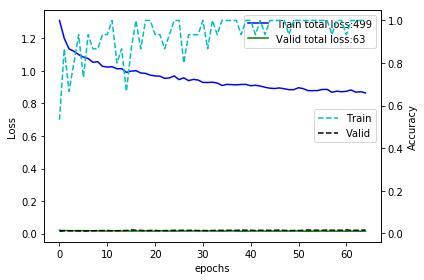

epoch 66
[Train]		 Loss: 0.88, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0146


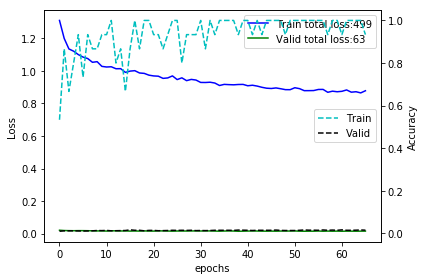

epoch 67
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0146


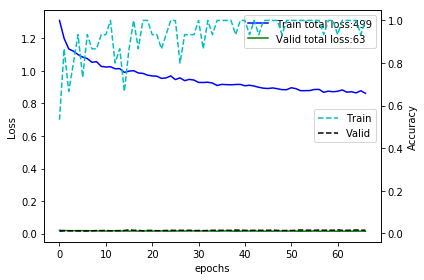

epoch 68
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


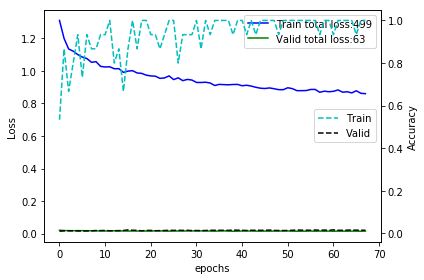

epoch 69
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0151


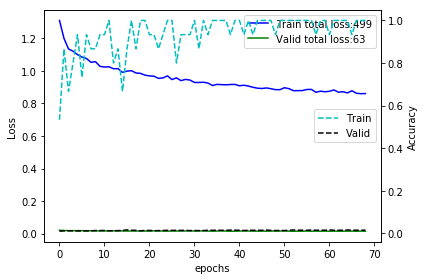

epoch 70
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


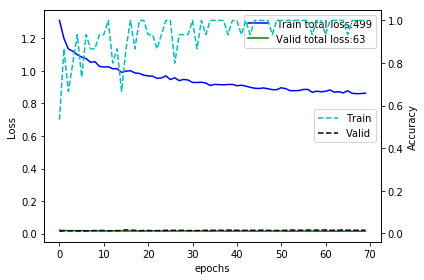

epoch 71
[Train]		 Loss: 0.86, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0146


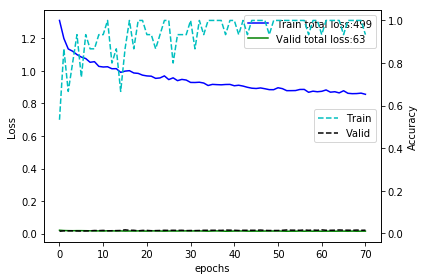

epoch 72
[Train]		 Loss: 0.87, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0121


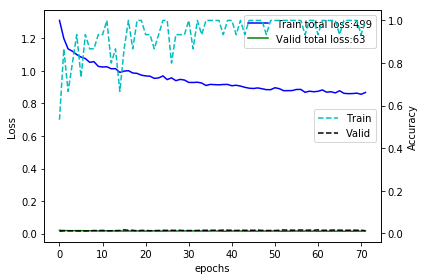

epoch 73
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


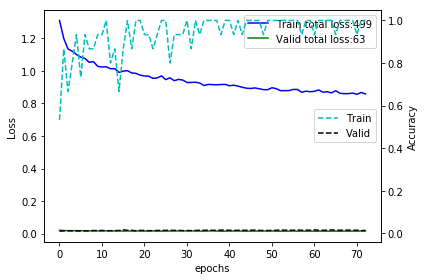

epoch 74
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


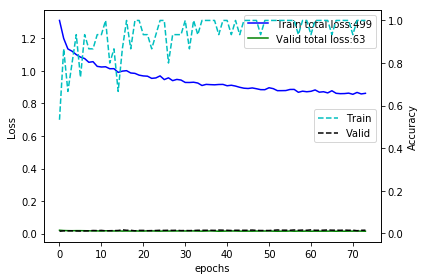

epoch 75
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


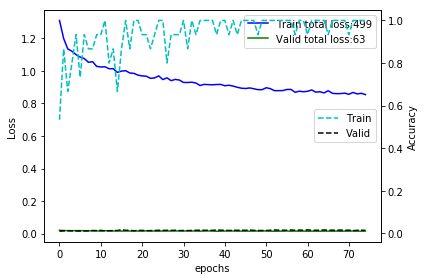

epoch 76
[Train]		 Loss: 0.85, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0141


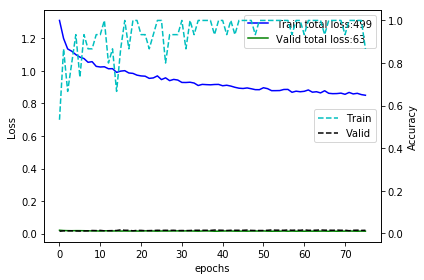

epoch 77
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


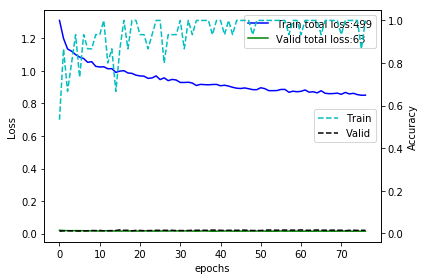

epoch 78
[Train]		 Loss: 0.86, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


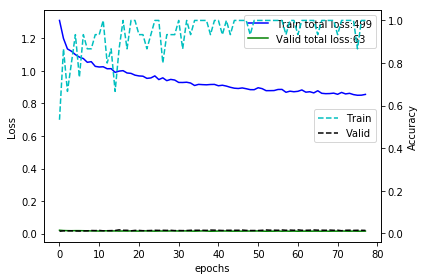

epoch 79
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0151


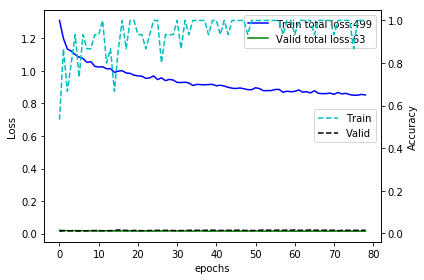

epoch 80
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0151


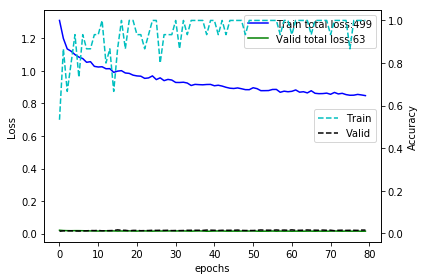

epoch 81
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


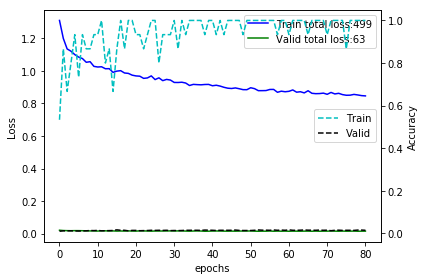

epoch 82
[Train]		 Loss: 0.85, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0141


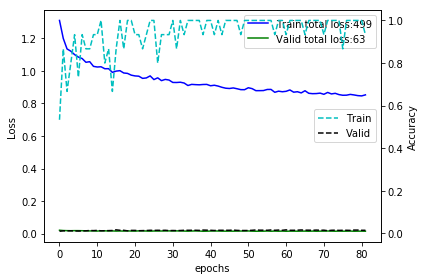

epoch 83
[Train]		 Loss: 0.84, accuracy: 0.8667
[Validation]	 J_a: 0.02, accuracy: 0.0136


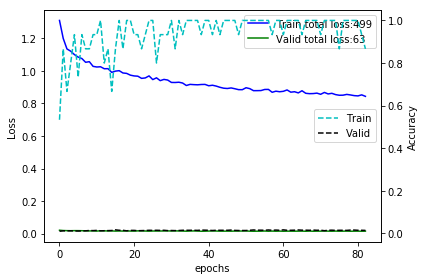

epoch 84
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


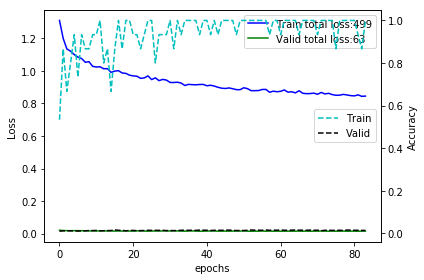

epoch 85
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


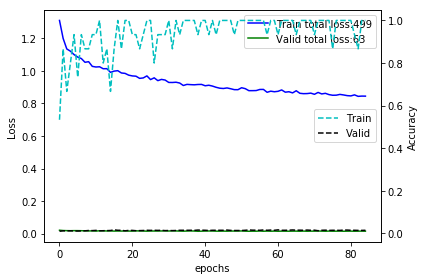

epoch 86
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0156


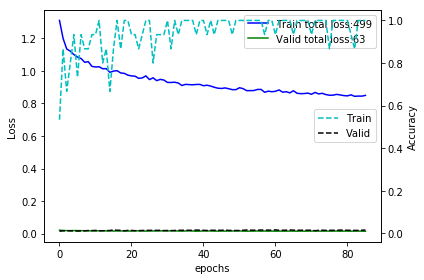

epoch 87
[Train]		 Loss: 0.85, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


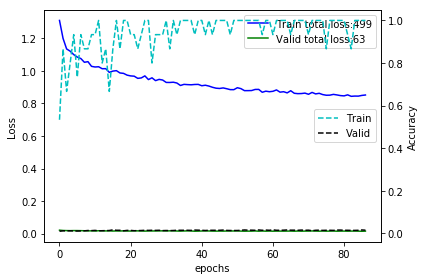

epoch 88
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0136


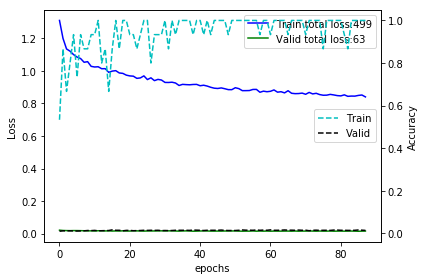

epoch 89
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


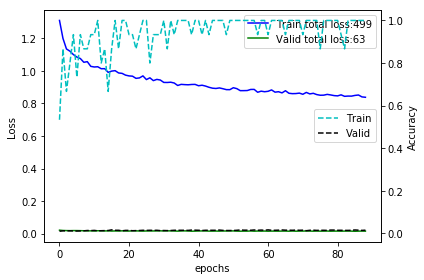

epoch 90
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0146


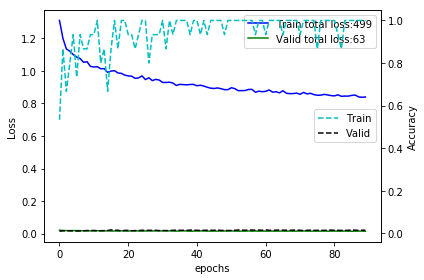

epoch 91
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0156


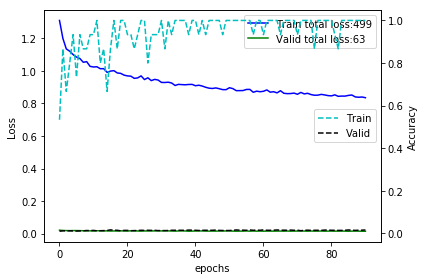

epoch 92
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


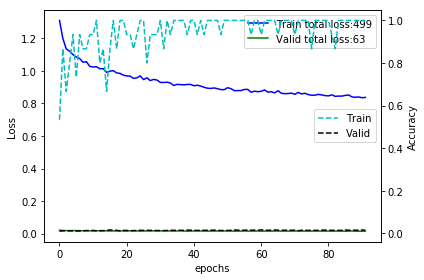

epoch 93
[Train]		 Loss: 0.83, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0146


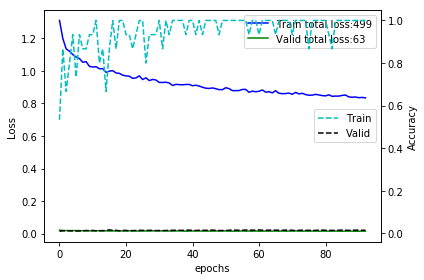

epoch 94
[Train]		 Loss: 0.84, accuracy: 0.9333
[Validation]	 J_a: 0.02, accuracy: 0.0146


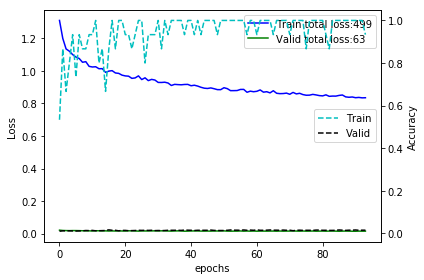

epoch 95
[Train]		 Loss: 0.83, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


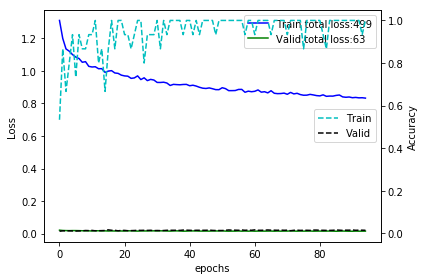

epoch 96
[Train]		 Loss: 0.83, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0151


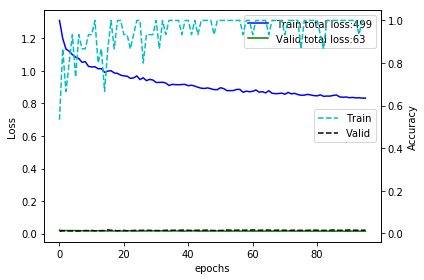

epoch 97
[Train]		 Loss: 0.83, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0146


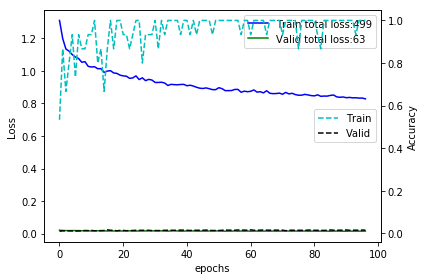

epoch 98
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.01, accuracy: 0.0156


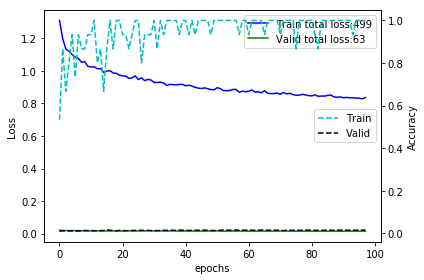

epoch 99
[Train]		 Loss: 0.84, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


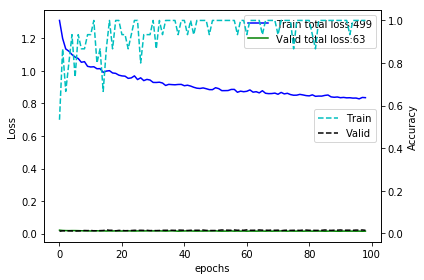

epoch 100
[Train]		 Loss: 0.83, accuracy: 1.0000
[Validation]	 J_a: 0.02, accuracy: 0.0141


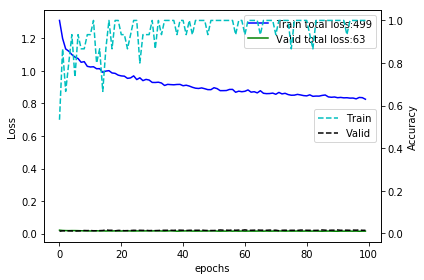

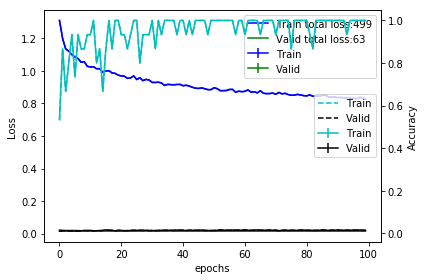

In [15]:
# dgm.vae.generate_random(False, batch_size, z1_size, [1, 28, 28])

train_total_loss_histories = [[] for x in range(10)]
train_accuracy_histories = [[] for x in range(10)]
valid_total_loss_histories = [[] for x in range(10)]
valid_accuracy_histories = [[] for x in range(10)]
mlp.set_data(labels_per_class=-1, is_example=False, extra_class=extra_class)
mlp.glorot_init()
mlp.run(n_epochs, verbose=1, show_progress=1, plot_progress=1, hist_epoch=20, is_balanced_relu=False, all0=False)
    
    

References
Auto-Encoding Variational Bayes https://arxiv.org/abs/1312.6114
Semi-Supervised Learning with Deep Generative Models https://arxiv.org/abs/1406.5298
Ladder Variational Autoencoders https://arxiv.org/abs/1602.02282
Auxiliary Deep Generative Models    https://arxiv.org/abs/1602.05473
Sylvester Normalizing Flows for Variational Inference  https://arxiv.org/abs/1803.05649
Improving Variational Auto-Encoders using Householder Flow https://arxiv.org/abs/1611.09630
Variational Inference with Normalizing Flows https://arxiv.org/abs/1505.05770
Convex combination linear IAF and the Householder Flow, J.M. Tomczak & M. Welling https://jmtomczak.github.io/deebmed.html

Github Ressources:
    https://github.com/wohlert/semi-supervised-pytorch
    https://github.com/jmtomczak/vae_vpflows
    https://github.com/jmtomczak/vae_householder_flow